# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [ ]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
#import modelproject
#Denne henviser til modelproject.py - gemmer her, hvis vi vil bruge med vores model og smide noget af det derind. 

We are solving a Microeconomics I problem from an exam. Exam 2016 winter, link is in readme and file has been uploaded as .pdf in this project. We are considering problem/exercise 2. 

# Visualization

Consumer theory setup

Utility function:
$u(x_1,x_2)=(x_1x_2+2x_2

The consumption possiblity frontier is: $(x_1,x_2) \in (0, \infty) x (0,\infty)$.

Furthermore we assume: $p_1, p_2, I>0$




We start out by visualizing the consumer's utility:

In [ ]:
#Utility function:
def u(x1,x2):
    u = x1*x2+2*x2
    return u

In [ ]:
#Vectors:
x1_vec = np.linspace(0, 20, 50)
x2_vec = np.linspace(0, 20, 50)

#Grid:
x1_grid, x2_grid = np.meshgrid(x1_vec, x2_vec)

#Utility function in grid:
u_grid = u(x1_grid, x2_grid)

#Plot:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x1_grid, x2_grid, u_grid, cmap=plt.cm.jet, cstride=1, rstride=1)

#Labels:
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.invert_xaxis()


# The consumer's utility maximization problem

We have the following utility max problem:
$max_{x_1,x_2 \geq 0} \:  x_1x_2+2x_2 \: s.t. \: p_1x_1+p_2x_2=I$

In [ ]:
#Turning variables to symbolics

x1 = sm.symbols('x_1')
x2 = sm.symbols('x_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I = sm.symbols('I')
U = sm.symbols('U')

utility = (x1*x2 + 2*x2)
budget_constraint = sm.Eq(p1*x1 + p2*x2, I)

Finding consumers demand for the goods respectively


In [ ]:
#Solve for x2 in budget constraint
x2constraint = sm.solve(budget_constraint, x2)
x2constraint[0]

Substitute result for x2

In [ ]:
utility_subx2 = utility.subs(x2, x2constraint[0])
utility_subx2

Finding the derivate w.r.t $x_1$ to maximize

In [ ]:
focx1 = sm.diff(utility_subx2, x1)
focx1

As usual this is set equal to zero and solved

In [ ]:
x1solv = sm.solve(sm.Eq(0,focx1),x1)
x1solv[0]

This resultat is substituted into the budget constraint, which then will be an expressing for x2

In [ ]:
x1constraint = sm.solve(budget_constraint, x1)
utility_subx1 = utility.subs(x1, x1constraint[0])
focx2 = sm.diff(utility_subx1, x2)
x2solv = sm.solve(sm.Eq(focx2, 0), x2)
x2solv[0]

For simplicitiy, we proceed with this solution, which is true for $I>2p_1$, thereby we ignore the corner solutions where $I \leq 2p_1$

 ## Case with values

We set values for prices and income. $p_1=4$, $p_2=1$ and $I=16$. A change in production of the goods causes the price of good 1 to fall to $p_1=1$


In [ ]:
#Define results
def x1func(p1,p2,I):
    return (I/2 - p1)/p1

def x2func(p1,p2,I):
    return (I/2 + p1)/p2

In [25]:
#Prices and income are implemented
print('x1 =',x1func(4,1,16))
print('x2 =',x2func(4,1,16))
print('utility =',u(x1func(4,1,16),x2func(4,1,16)))

x1 = 1.0
x2 = 12.0
utility = 36.0


In [24]:
#Case with a fall in price
print('x1 =',x1func(1,1,16))
print('x2 =',x2func(1,1,16))
print('utility =',u(x1func(1,1,16),x2func(1,1,16)))

x1 = 7.0
x2 = 9.0
utility = 81.0


**Results are presented graphically**

In [26]:
# Rewriting utility
utility_Eq = sm.Eq(U,utility)

# Solving for x2 in utility function and budget constraint to plot it
print('x2(utility) =', sm.solve(utility_Eq,x2))
print('x2(budget) =', sm.solve(budget_constraint, x2))

x2(utility) = [U/(x_1 + 2)]
x2(budget) = [(I - p_1*x_1)/p_2]


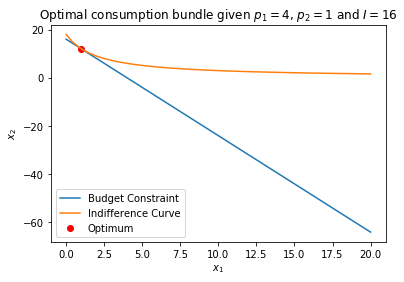

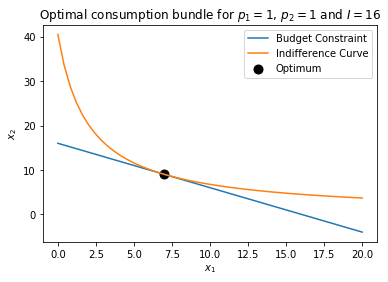

In [32]:
#Indifference curves and budget constraint in terms of x2
def budget(x1,I,p1,p2):
    return (I-p1*x1)/p2

def indiff(x1,u,p1,p2):
    return u/(x1+2)
#Plot indifference curve, budget constraint and optimum for p1=4 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,16,4,1),label='Budget Constraint') 
ax.plot(x1_vec,indiff(x1_vec,36,4,1),label='Indifference Curve')
ax.scatter(x1func(4,1,16),x2func(4,1,16),u(x1func(4,1,16),x2func(4,1,16)),color='red',label='Optimum')

#Title & labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.title('Optimal consumption bundle given $p_1 = 4$, $p_2 = 1$ and $I = 16$')
ax.legend();

#Plot indifference curve, budget constraint and optimum for p1=1
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x1_vec,budget(x1_vec,16,1,1),label='Budget Constraint')
ax.plot(x1_vec,indiff(x1_vec,81,1,1),label='Indifference Curve')
ax.scatter(x1func(1,1,16),x2func(1,1,16),u(x1func(1,1,16),x2func(1,1,16)),color='red',label='Optimum')

#Title & labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.title('Optimal consumption bundle for $p_1=1$, $p_2 = 1$ and $I = 16$')
ax.legend();


# Evt. lav illustrationer med en FloatSlider. 

# Numerical approach

In [33]:
#Find optimal consumption
I = 16
p1 = 1
p2 = 1

def u_new(x1,x2):
    return x1*x2 + 2 * x2

#Negative sign to use minimzer
def func(x1,I,p1,p2):
    x2 = (I-p1*x1)/p2
    return -u_new(x1,x2)

#Solve
solution = optimize.minimize_scalar(
    func,method='bounded',
    bounds=(0,I/p2),args=(I,p1,p2))

x1 = solution.x
x2 = (I-p1*x1)/p2
u_func = u_new(x1,x2)

print(f'x1 = {x1:.1f}')
print(f'x2 = {x2:.1f}')
print(f'u  = {u_func:.1f}')
print(f'I-p1*x1-p2*x2 = {I-p1*x1-p2*x2:.2f}')

x1 = 7.0
x2 = 9.0
u  = 81.0
I-p1*x1-p2*x2 = 0.00


Same result. 

# Social planner

We now implement a social planner who is the distributor of the goods that consumer A bought at $p_1=1$ and $p_2=1$. We introduce one more consumer, so that the planner has to divide the goods between consumer A and B. We have $x_1=7$ and $x_2=9$, and we assumme they have zero endowments. Consumer A still has the same utility function and consumer B has the following:
$u_B=4x_{1B}+4x_{2B}$

We introduce the following social utility function, which will maximize the utility for the consumer with the lowest utility: $S(u_A,u_B) = min(u_A,u_B)$


In [34]:
#Define symbols:
X1 = sm.symbols('X1')
X2 = sm.symbols('X2')
#Define utility functions:
uA = X1*X2 + 2*X2
uB = 4*X1 + 4*X2

In order to optimize the social planner's problem the first order conditions is found for both consumers and with respect to both goods. 

In [35]:
foc1uA = sm.diff(uA, X1)
foc2uA = sm.diff(uA, X2)
foc1uB = sm.diff(uB, X1)
foc2ub = sm.diff(uB, X2)

In [38]:
#MRS for both
mrsA = -foc1uA/foc2uA
mrsB = -foc1uB/foc2ub

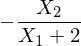

In [39]:
#MRS for consumer A:
mrsA

In [40]:
#MRS for consumer B:
mrsB

In [42]:
#The marginal rate of substution for consumer A and B are set equal to eachother
MRSeq = sm.Eq(mrsB,mrsA)

#Solve for x2
x2_d_A = sm.solve(MRSeq,X2)
x2_d_A[0]

So we now know, that when $x_2=x_1+2$, then consumer A has a MRS equal to -1. The solutions here are all pareto optimal for the consumers. This is not the case for the social planner though, now we will find the utility for consumer A by substituting in $x_2=x_1+2$.

In [43]:
#Substituting
uA_x1 = uA.subs(X2,x2_d_A[0])
uA_x1

In [45]:
#Defining excess goods 
e_x1 = 7 - X1
e_x2 = 9 - x2_d_A[0]

#Substitute into utility for consumber B
uB_x1 = uB.subs(X1, e_x1)
uB_x2 = uB_x1.subs(X2, e_x2)
uB_x2

In [46]:
#Utility functions for the two consumers are set equal to each other. Functions expressed of $x_1$.
uA_uB = sm.Eq(uA_x1-uB_x2,0)
uA_uB

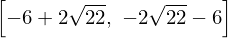

In [55]:
#Solve for optimal x1 for consumer A
x1_sol_A_ = sm.solve(uA_uB,X1)
x1_sol_A_

In [57]:
#Since the goods can't be negative, we disregard the negative value and keep the positive one:
x1_sol_A = x1_sol_A_[0]
x1_sol_A

In [62]:
print(-6+2*22**(0.5))

3.3808315196468595


Optimal solution for the social planner with $x_1 \approx 3,381$, this result is used to find the optimal $x_2$

In [71]:
#Substitute optimal into x2
x2_sol_A = x2_d_A[0].subs(X1,x1_sol_A)
x2_sol_A

In [72]:
print(-4+2*(22)**(0.5))

5.3808315196468595


These results also correspond with the function we derived earlier: $x_2=x_1+2$. Since we have $x_1 \approx 3,381$, when 2 is added we get as desired $x_1 \approx 5,381$.  
Now we will proceed and solve for consumer B:

In [75]:
#Using solution for good 1 for consumer A in consumber B's excess function:
x1_sol_B = e_x1.subs(X1,x1_sol_A)
x1_sol_B

In [76]:
print(13-2*2**0.5)

10.17157287525381


In [80]:
#Using solution for consumer A in consumber B's excess function: 
x2_sol_B_ = e_x2.subs(x2_d_A[0],x2_sol_A) #substitute consumer A's demand for x2 into excess function for consumer B
x2_sol_B = x2_sol_B_.subs(X1,x1_sol_A)    #substitute consumers A's demand for x1 into solution function for consumer B
x2_sol_B


Consumer B has the same amount of good 1 and 2, which intuitvely makes good sense when considering the utility function. 
Now we proceed and find the utility for both consumers:

In [88]:
uA_sol = x1_sol_A*x2_sol_A + 2*x2_sol_A
uB_sol = 4*x1_sol_B + 4*x2_sol_B

print(f'utility A = {int(uA_sol):.1f}')
print(f'utility B = {int(uB_sol):.1f}')

utility A = 28.0
utility B = 28.0


MRS is equal to -1 for both, while utilites are $u_A = u_B = 28$, whereas this is how the social planner would distribute the goods w.r.t. to maximizing $S(u_A,u_B) = min(u_A,u_B)$

## Plot and visualize

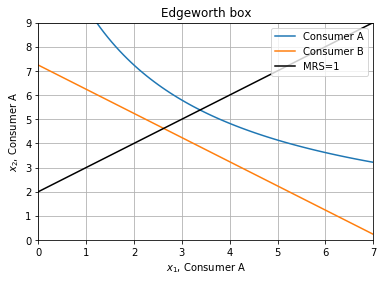

In [96]:
X1_star = 7
X2_star = 9

#Plotting in the same diagram, by using three functions where x2 is isolated

def x2_A(x1):
    return uA_sol/(x1+2)

def x2_MRS(x1):
    return x1 + 2

def x2_B(x1):
    return (uB_sol-4*(x1))/4

x1 = np.linspace(0,8,100)

plt.plot(x1,x2_A(x1))
plt.plot(x1,x2_B(x1))
plt.plot(x1,x2_MRS(x1),color='black')
plt.legend(['Consumer A','Consumer B','MRS=1'],loc=1)
plt.axis([0,X1_star,0,X2_star]);
plt.ylabel('$x_2$, Consumer A')
plt.xlabel('$x_1$, Consumer A')
plt.title('Edgeworth box')
plt.grid();

# Conclusion